In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np 
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf
from statsmodels.stats.stattools import durbin_watson

In [10]:
# read the csv file with WA COVID 19 data
df2 = pd.read_csv("washington-history.csv")

In [11]:
df2

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,WA,5041.0,NaN,0,NaN,19599.0,19599.0,431.0,43,...,5393756.0,24040,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,2021-03-06,WA,5041.0,NaN,9,NaN,19556.0,19556.0,431.0,56,...,5369716.0,25314,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,2021-03-05,WA,5032.0,NaN,20,NaN,19500.0,19500.0,413.0,34,...,5344402.0,24021,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,2021-03-04,WA,5012.0,NaN,24,NaN,19466.0,19466.0,461.0,33,...,5320381.0,18873,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,2021-03-03,WA,4988.0,NaN,19,NaN,19433.0,19433.0,467.0,61,...,5301508.0,21178,NaN,NaN,NaN,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2020-01-17,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
416,2020-01-16,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
417,2020-01-15,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
418,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


Question 1: What is the highest daily percentage of daily death increases of currently hospitalized people due to COVID 19 in Washington?

In [313]:
# What is the highest number of confirmed deaths? 
df2["deathConfirmed"].max()

3016.0

In [314]:
# Create a new column with percentages
df3 = df2["Percentage of deaths"]= df2["deathIncrease"]/df2["hospitalizedCurrently"]*100

In [315]:
df3

0      0.000000
1      2.088167
2      4.842615
3      5.206074
4      4.068522
         ...   
415         NaN
416         NaN
417         NaN
418         NaN
419         NaN
Length: 420, dtype: float64

In [316]:
print ("The highest percentage of daily death increases out of the people that were currently hospitalized is",df3.max(),'%.')

The highest percentage of daily death increases out of the people that were currently hospitalized is 15.198863636363635 %.


Question 2: Is there any correlation between the increased number of people that are hospitalized and the number of increased deaths? 

In [317]:
# calculate correlation
corr = df2['hospitalizedIncrease'].corr(df2['deathIncrease'])
print ("The correlation coefficient between number of people that are hospitalized and number of deaths is", corr)

The correlation coefficient between number of people that are hospitalized and number of deaths is 0.08474174134719108


This correlation coefficient indicates that there is a weak positive correlation between the number of people hospitalized and the number of deaths. As correlation does not imply causation further analysis is needed to determine the relationship between these variables. In the next question we will consider whether the accumulated monthly and weekly data for both increased number of hospitalized people and number of increased deaths.

Question 3: Does this correlation value change when we consider weekly and monthly data for both the increased number of people that are hospitalized and the number of increased deaths? 

In [344]:
weekly_data = df2.groupby(df2['date'].dt.week).agg({
    'deathIncrease': 'sum',
    'hospitalizedIncrease': 'sum'
})

# Compute the correlation between the two columns
correlation = weekly_data['deathIncrease'].corr(weekly_data['hospitalizedIncrease'])

# Print the correlation
print ("The correlation coefficient between weekly number of people that are hospitalized and weekly number of deaths is", correlation)

The correlation coefficient between weekly number of people that are hospitalized and weekly number of deaths is 0.19795081055969876


/var/folders/qr/3htbpbh94t1bt4cyn11s_ylc0000gn/T/ipykernel_8267/2816580274.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekly_data = df2.groupby(df2['date'].dt.week).agg({


In [345]:
weekly_data = df2.groupby(df2['date'].dt.month).agg({
    'deathIncrease': 'sum',
    'hospitalizedIncrease': 'sum'
})

# Compute the correlation between the two columns
correlation2 = weekly_data['deathIncrease'].corr(weekly_data['hospitalizedIncrease'])

# Print the correlation
print ("The correlation coefficient between increase of weekly number of people that are hospitalized and the increase of weekly number of deaths is", correlation2)

The correlation coefficient between increase of weekly number of people that are hospitalized and the increase of weekly number of deaths is 0.5002450021368663


The monthly correlation is greater than the weekly correlation and the weekly correlation is greater than the daily correlation between the increase of number of people that are hospitalized and the increase of number of deaths. This indicates stronger correlation between weekly and monthly accumulated data. This might occur due to different differences.

Accumulating weekly and monthly data, we minimize the relevance that time lags in reporting cases and deaths play in data which strengthens the correlation. 

Question 4: Is there autocorrelation between daily data of people who are hospitalized currently? 

In [272]:
# Create new dataset that focuses on date and number of people who are hospitalized currently 
new_result=df2.loc[:,["date","hospitalizedCurrently"]]
new_result

,date,hospitalizedCurrently
0,2021-03-07,431.0
1,2021-03-06,431.0
2,2021-03-05,413.0
3,2021-03-04,461.0
4,2021-03-03,467.0
...,...,...
415,2020-01-17,NaN
416,2020-01-16,NaN
417,2020-01-15,NaN
418,2020-01-14,NaN


In [289]:
# Create new column using datetime function 
new_result['date'] = pd.to_datetime(new_result['date'])

# Create new dataframe that indexes the date variable
new_result2 = new_result.set_index('date')

In [290]:
# print new_result dataframe
new_result

,date,hospitalizedCurrently
0,2021-03-07,431.0
1,2021-03-06,431.0
2,2021-03-05,413.0
3,2021-03-04,461.0
4,2021-03-03,467.0
...,...,...
415,2020-01-17,NaN
416,2020-01-16,NaN
417,2020-01-15,NaN
418,2020-01-14,NaN


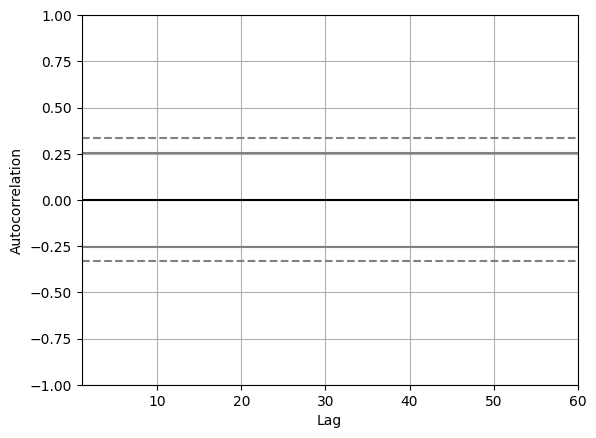

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]


In [275]:
ts = pd.Series(new_result['hospitalizedCurrently'], index=df['date'])
pd.plotting.autocorrelation_plot(ts)
plt.show()

# Calculate the autocorrelation using the acf function
autocorr = acf(ts, nlags=20)
print(autocorr)

The regular lines indicate autocorrelation values at different lags, and the dashed lines represent the confidence intervals. The dashed lines represent the 95% confidence interval, while the light dashed lines represent the 99% confidence interval.

The significance of the autocorrelation values is determined by whether they fall within the confidence intervals. If an autocorrelation value falls outside the confidence interval, it suggests that the corresponding lag is statistically significant. For example, if a value is above the 95% confidence interval, it suggests that the corresponding lag has a statistically significant positive autocorrelation.
Conversely, if a value is below the 95% confidence interval, it suggests that the corresponding lag has a statistically significant negative autocorrelation.

In our plot, the regular lines do not fall within the confidence interval, hence, the data is not statistically significant. 

Visualization: Create two visualizations of weekly averages and daily data of the number of people who are currently hospitalized over time. 

In [276]:
# Create new dataframe with average data of people who are currently hospitalized
weekly_avg["Average hospitalized currently"] = new_result2.resample('W').mean()
weekly_avg

,hospitalizedCurrently,Average hospitalized currently
date,,
2020-01-19,NaN,NaN
2020-01-26,NaN,NaN
2020-02-02,NaN,NaN
2020-02-09,NaN,NaN
2020-02-16,NaN,NaN
2020-02-23,NaN,NaN
2020-03-01,NaN,NaN
2020-03-08,NaN,NaN
2020-03-15,NaN,NaN


In [254]:
# Create new csv file with the data average
weekly_avg.to_csv('result_mean.csv')
df = pd.read_csv('result_mean.csv').reset_index()
df

,index,date,hospitalizedCurrently,Average hospitalized currently
0,0,2020-01-19,NaN,NaN
1,1,2020-01-26,NaN,NaN
2,2,2020-02-02,NaN,NaN
3,3,2020-02-09,NaN,NaN
4,4,2020-02-16,NaN,NaN
5,5,2020-02-23,NaN,NaN
6,6,2020-03-01,NaN,NaN
7,7,2020-03-08,NaN,NaN
8,8,2020-03-15,NaN,NaN
9,9,2020-03-22,NaN,NaN


In [255]:
# Create two variables that represent date and number of people who are hospitalized currently
x= new_result["date"]
y= new_result["hospitalizedCurrently"]

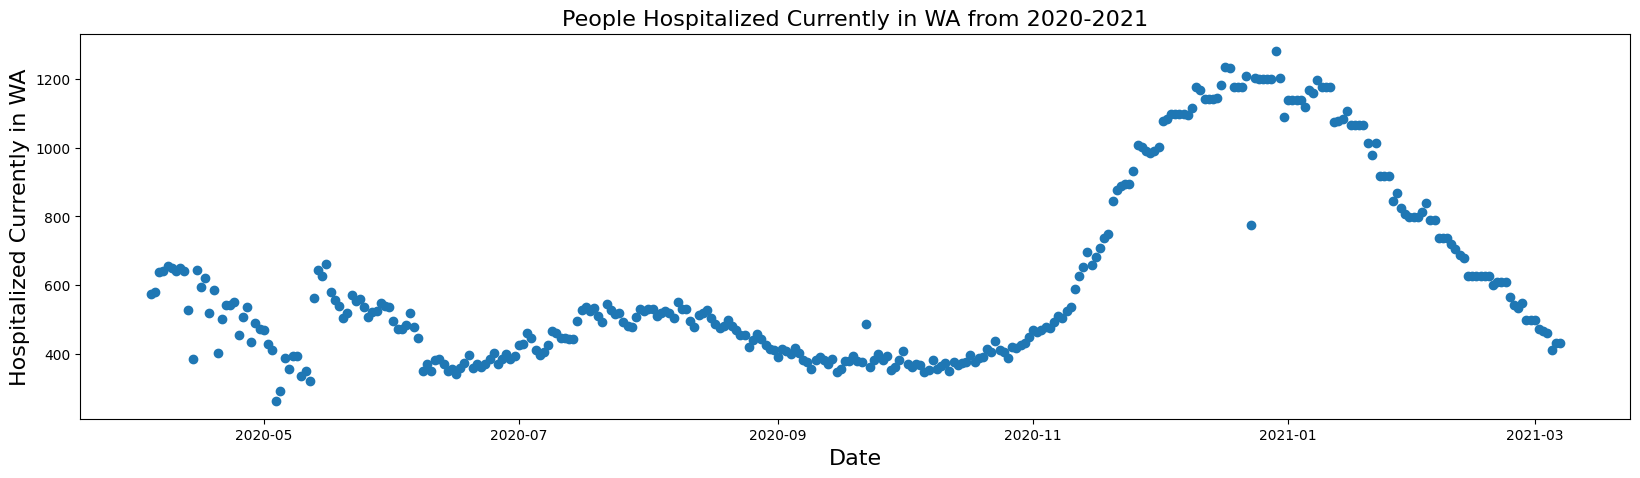

In [256]:
# Create a scatterplot with all the daily information on people who are currently hospitalized
fig2=plt.figure()
plt.close(fig2)
plt.figure(figsize = (20,5))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Hospitalized Currently in WA', fontsize=16)
plt.title('People Hospitalized Currently in WA from 2020-2021', fontsize=16)
plt.scatter(x, y)

In [257]:
# Create two variables that represent date and weekly average number of people who are hospitalized currently 
x = df['index']
y = df['hospitalizedCurrently']

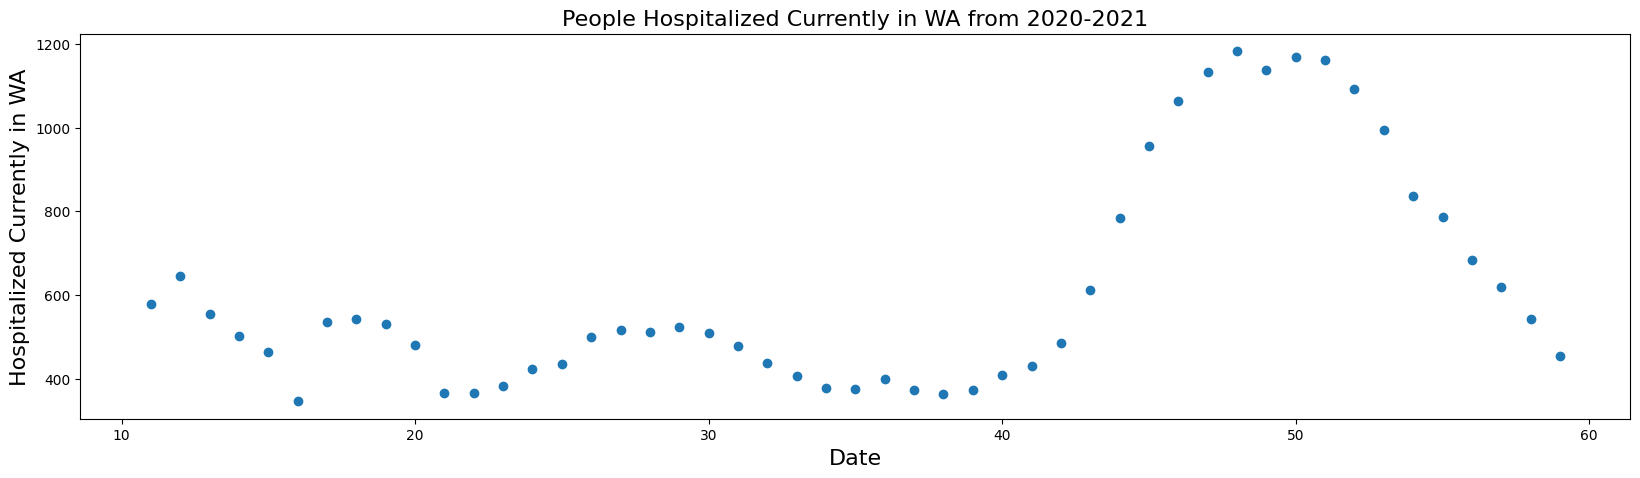

In [258]:
# Create a scatterplot with all the weekly average information on people who are currently hospitalized
fig=plt.figure()
plt.close(fig)
plt.figure(figsize = (20,5))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Hospitalized Currently in WA', fontsize=16)
plt.title('People Hospitalized Currently in WA from 2020-2021', fontsize=16)
plt.scatter(x, y)

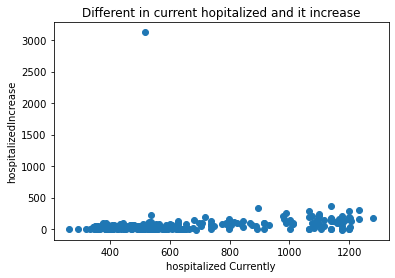

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
#data = pd.read_csv("washington-history.csv")

# Select the relevant columns for the scatter plot
x = df2["hospitalizedCurrently"]
y = df2["hospitalizedIncrease"]

# Create the scatter plot using Matplotlib
plt.scatter(x, y, alpha=1)

# Set the title and axis labels
plt.title("Different in current hopitalized and it increase")
plt.xlabel("hospitalized Currently")
plt.ylabel("hospitalizedIncrease")

# Display the plot
plt.show()


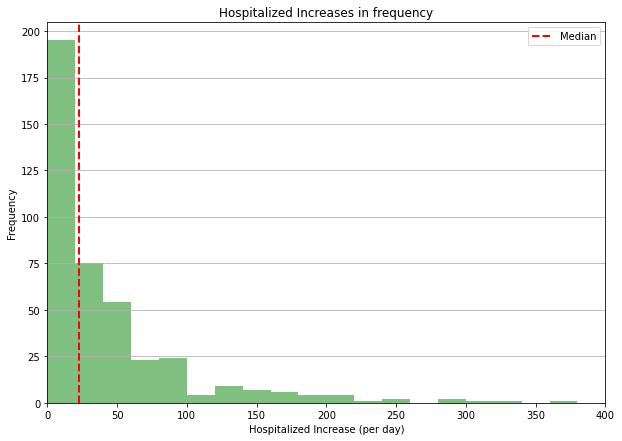

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
#df = pd.read_csv("your_data_file.csv")

# Convert dates to integer values
df2['date'] = pd.to_datetime(df2['date'])
df2['date'] = df2['date'].apply(lambda x: x.strftime('%Y-%m-%d'))

# Set the figure size
plt.figure(figsize=(10, 7))

# Create a histogram of hospitalized increases
bin_sizes, _, _ = plt.hist(df2.hospitalizedIncrease, bins=range(0, 420, 20), color='green', alpha=0.5)

# Add a vertical line to indicate the median value
median = df2.hospitalizedIncrease.median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')

# Set the title and axis labels
plt.title("Hospitalized Increases in frequency")
plt.xlabel("Hospitalized Increase (per day)")
plt.ylabel("Frequency")

# Set the x-axis range and tick marks
plt.xlim(0, 400)
plt.xticks(range(0, 401, 50))

# Add a legend and grid to the plot
plt.legend()
plt.grid(axis='y')

# Display the plot
plt.show()